In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('take_home_file.csv')

In [13]:
#selecting correct features

features = ['trip_length', 'vehicle_price', 'guest_trip_rank', 'lead_time', 'driver_age']
X = data[features]
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)




In [14]:
#standardizing

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [17]:
k = 5
kmeans = KMeans(n_clusters=k,random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [24]:


data['Cluster'] = kmeans.labels_

for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    cluster_df = pd.DataFrame(cluster_data)
    # print(f'Cluster: {cluster}')
    # print(cluster_data.describe()) 
    print(cluster_df.head())

   reservation_id   created  driver_id  owner_id  vehicle_id  driver_age  \
3         1566375  1/1/2017     585788   1155720      190819        28.0   
4         1606634  1/1/2017     781705   1387396      175907        23.0   
5         1562428  1/1/2017     860223    810385      117021        25.0   
6         1578602  1/1/2017     900863   2016320      210755        25.0   
9         1608409  1/1/2017    1005678    338656       66777        31.0   

  market_area     delivery_type           make       model  ... delivery_fee  \
3    Market B  Airport Delivery  Mercedes-Benz     C-Class  ...         20.0   
4    Market A       No Delivery       Chrysler  PT Cruiser  ...          0.0   
5    Market A  Airport Delivery  Mercedes-Benz     C-Class  ...         50.0   
6    Market B       No Delivery            Kia      Optima  ...          0.0   
9    Market B       No Delivery            Kia         Rio  ...          0.0   

   other_fee total_fees  gross_revenue  owner_earnings  net_re

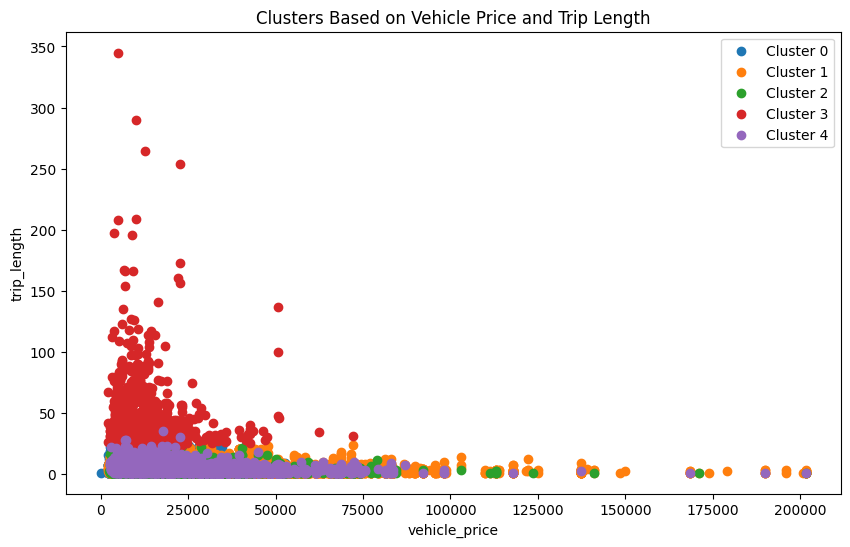

In [20]:
x_feature = 'vehicle_price'
y_feature = 'trip_length'


plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data[x_feature], cluster_data[y_feature], label=f'Cluster {cluster}')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('Clusters Based on Vehicle Price and Trip Length')
plt.legend()
plt.show()